In [11]:
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sqlalchemy import create_engine, text
from dotenv import load_dotenv

In [12]:
# Load environment variables from .env file
load_dotenv(os.path.join(os.getcwd(), '..', '.env'))

# Database connection parameters from environment variables
DB_USER = os.getenv('DB_USER')
DB_PASSWORD = os.getenv('DB_PASSWORD')
DB_HOST = os.getenv('DB_HOST')
DB_PORT = os.getenv('DB_PORT')
DB_NAME = os.getenv('DB_NAME')

# Create a database connection
engine = create_engine(
    f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
)

# Query to fetch data from the database
query_1 = "SELECT * FROM inspection.cv_detections;"
query_2 = "SELECT * FROM ml.inspection_training;"

In [ ]:
# Load SQL data into a pandas dataframe using a direct connection
with engine.connect() as connection:
    df_detections = pd.read_sql(text(query_1), connection)

print(f"📊 Data loaded: {df_detections.shape[0]} rows × {df_detections.shape[1]} columns")
print(f"\nFirst few rows:")
df_detections.head()

📊 Data loaded: 2134 rows × 13 columns

First few rows:


,detection_id,image_name,shipment_id,container_id,class_id,confidence,bbox_x_center,bbox_y_center,bbox_width,bbox_height,bbox_area,detected_at,model_version
0,c14e129b-62fa-48c7-9d7c-98acedb7f1bf,14_20220428T012931844Z_s00.mp4_108400.jpg,2ad1dfa0-0791-4e07-b12c-9f5b268b6f66,CNT-59083db3-904b-4876-992a-3aee14f226d7,0,0.989,0.535185,0.273698,0.035185,0.197396,0.006945,2026-01-26 18:37:47.802469,yolo_v8
1,b73784e2-1036-4d72-9b7c-e3662afbaeb4,14_20220428T012931844Z_s00.mp4_108400.jpg,2ad1dfa0-0791-4e07-b12c-9f5b268b6f66,CNT-59083db3-904b-4876-992a-3aee14f226d7,0,0.987,0.954630,0.268490,0.029630,0.226562,0.006713,2026-01-26 18:37:47.802495,yolo_v8
2,6dd811b3-6437-4d41-b73e-b513de0d3bee,14_20220428T012931844Z_s00.mp4_108400.jpg,2ad1dfa0-0791-4e07-b12c-9f5b268b6f66,CNT-59083db3-904b-4876-992a-3aee14f226d7,1,0.876,0.145833,0.521875,0.084259,0.022917,0.001931,2026-01-26 18:37:47.802498,yolo_v8
3,f4345e22-343c-41ab-9277-bea38daf2001,114_20220425T114900821Z_s00.mp4_35100.jpg,df75a457-a3f2-42b3-98fb-650fea877b70,CNT-8cebf7ae-ecfd-4484-abce-2a60220a5352,0,0.937,0.561111,0.274740,0.053704,0.226562,0.012167,2026-01-26 18:37:47.802771,yolo_v8
4,5eb3a128-9d3a-4d11-81da-2f806b55d278,114_20220425T114900821Z_s00.mp4_35100.jpg,df75a457-a3f2-42b3-98fb-650fea877b70,CNT-8cebf7ae-ecfd-4484-abce-2a60220a5352,0,0.751,0.787500,0.351042,0.032407,0.159375,0.005165,2026-01-26 18:37:47.802774,yolo_v8


In [ ]:
with engine.connect() as connection:
    df_inspection = pd.read_sql(text(query_2), connection)

In [ ]:
obj_cols = df_detections.select_dtypes(include=['object']).columns
num_cols = df_detections.select_dtypes(include=['int', 'float64']).columns

print(f"data of object columns: {obj_cols}")
print(f"data of numerical columns: {num_cols}")

data of object columns: Index(['detection_id', 'image_name', 'shipment_id', 'container_id', 'class_id',
       'model_version'],
      dtype='object')
data of numerical columns: Index(['confidence', 'bbox_x_center', 'bbox_y_center', 'bbox_width',
       'bbox_height', 'bbox_area'],
      dtype='object')


# Container damage detection to prevent bad shipment
--------
# SQL comprehensive analytics data for proper data:
### * **Insert container images for damage box detection**
### * **Analytics statisctical to ensure the shipments are reliable**
### * **Combine dataframe ml_inspection and cv_detections to ensure the container are damaged**

## Feature engineering

In [ ]:
df_detections.drop(columns=['model_version'], inplace=True)

# Change df['class_id'] to integer type
df_detections['class_id'] = df_detections['class_id'].astype(int)

In [ ]:
df_detections.head(3)

,detection_id,image_name,shipment_id,container_id,class_id,confidence,bbox_x_center,bbox_y_center,bbox_width,bbox_height,bbox_area,detected_at
0,c14e129b-62fa-48c7-9d7c-98acedb7f1bf,14_20220428T012931844Z_s00.mp4_108400.jpg,2ad1dfa0-0791-4e07-b12c-9f5b268b6f66,CNT-59083db3-904b-4876-992a-3aee14f226d7,0,0.989,0.535185,0.273698,0.035185,0.197396,0.006945,2026-01-26 18:37:47.802469
1,b73784e2-1036-4d72-9b7c-e3662afbaeb4,14_20220428T012931844Z_s00.mp4_108400.jpg,2ad1dfa0-0791-4e07-b12c-9f5b268b6f66,CNT-59083db3-904b-4876-992a-3aee14f226d7,0,0.987,0.954630,0.268490,0.029630,0.226562,0.006713,2026-01-26 18:37:47.802495
2,6dd811b3-6437-4d41-b73e-b513de0d3bee,14_20220428T012931844Z_s00.mp4_108400.jpg,2ad1dfa0-0791-4e07-b12c-9f5b268b6f66,CNT-59083db3-904b-4876-992a-3aee14f226d7,1,0.876,0.145833,0.521875,0.084259,0.022917,0.001931,2026-01-26 18:37:47.802498


/var/folders/s0/01h8dy1902zgb59dr1yqy6jr0000gn/T/ipykernel_2416/2003701352.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_cv_detections.corr()


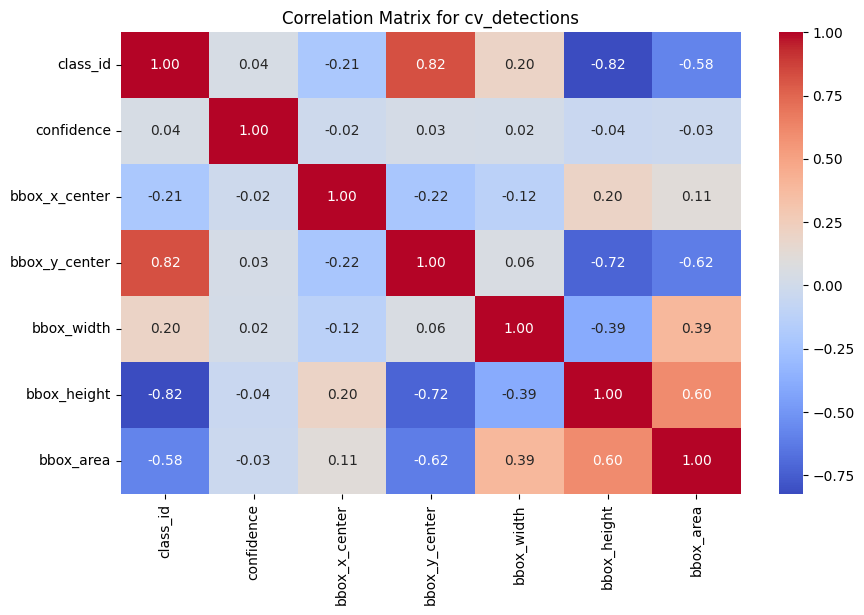

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
corr = df_cv_detections.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for cv_detections')
plt.show()

In [ ]:
df_inspection

,shipment_id,total_detections,avg_confidence,total_damage_area,dent_count,defect_rate,is_high_risk
0,76ca8527-35b6-4b6e-82a5-ac1516853d14,4,0.842500,0.011481,0,0.226086,0
1,bf046423-d395-4109-8431-e03a6ac08bf5,2,0.887000,0.012859,0,0.232399,1
2,160ad73a-faa7-4cd5-a68d-7c351a0c30a1,2,0.856000,0.005352,0,0.224839,0
3,f221fddb-9725-456b-a674-d6c3315328b2,2,0.866000,0.010610,0,0.221834,0
4,6a5c35a6-8d70-4b53-982e-9ece522a34c2,3,0.908000,0.008472,0,0.227898,0
...,...,...,...,...,...,...,...
921,e57e955d-2c03-4772-9ac4-9fe7979fd1a4,3,0.810667,0.018552,0,0.360559,1
922,5044cfb8-b78b-4ddf-a682-57c6b4d5dc77,2,0.836000,0.019396,0,0.360559,1
923,b7197f2d-1763-4eb0-89cb-5769d7d9b12d,2,0.943000,0.011474,0,0.360559,1
924,a384a479-8aab-4d5a-b0ff-e4df80a4558a,3,0.892667,0.022298,0,0.341844,1


In [ ]:
df_inspection["shipment_id"]

0      76ca8527-35b6-4b6e-82a5-ac1516853d14
1      bf046423-d395-4109-8431-e03a6ac08bf5
2      160ad73a-faa7-4cd5-a68d-7c351a0c30a1
3      f221fddb-9725-456b-a674-d6c3315328b2
4      6a5c35a6-8d70-4b53-982e-9ece522a34c2
                       ...                 
921    e57e955d-2c03-4772-9ac4-9fe7979fd1a4
922    5044cfb8-b78b-4ddf-a682-57c6b4d5dc77
923    b7197f2d-1763-4eb0-89cb-5769d7d9b12d
924    a384a479-8aab-4d5a-b0ff-e4df80a4558a
925    f5f0edd1-dc95-4e44-94f5-f456423f28de
Name: shipment_id, Length: 926, dtype: object